In [2]:
import numpy as np
import pandas as pd
import ruptures as rpt
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df = pd.read_csv('data/clean_data.csv') #clean_data #data_with_extra_columns

In [3]:
target = 'accuracy_all_%'  #'quality_123'

signal = df[target].values

# model = rpt.Pelt(model="rbf", min_size=5).fit(signal)
# changes = model.predict(pen=0.1)

model = rpt.Binseg(model="rbf", min_size=5).fit(signal)
changes = model.predict(n_bkps=40)

# model = rpt.KernelCPD(kernel="rbf", min_size=5).fit(signal)
# changes = model.predict(n_bkps=60)

changes = [cp for cp in changes if cp < len(df)]

In [4]:
indexes = [0] + changes + [len(signal)-1]

p-value > 0.05 → не отвергаем H₀ (нормальность).

p-value ≤ 0.05 → отвергаем H₀ (ненормальность).

In [5]:
for i in range(len(indexes) - 1):
    data = signal[indexes[i]:indexes[i+1]]
    shapiro_test = stats.shapiro(data)

    print(f"[{indexes[i]}, {indexes[i+1]}] - {shapiro_test.pvalue > 0.05}, W = {shapiro_test.statistic:.3f}")


[0, 10] - True, W = 0.888
[10, 25] - True, W = 0.937
[25, 30] - True, W = 0.924
[30, 35] - True, W = 0.852
[35, 40] - True, W = 0.957
[40, 45] - True, W = 0.929
[45, 55] - True, W = 0.956
[55, 65] - True, W = 0.940
[65, 75] - True, W = 0.845
[75, 85] - True, W = 0.927
[85, 90] - True, W = 0.997
[90, 95] - True, W = 0.812
[95, 105] - True, W = 0.960
[105, 110] - True, W = 0.903
[110, 140] - True, W = 0.940
[140, 145] - True, W = 0.900
[145, 150] - True, W = 0.897
[150, 160] - True, W = 0.940
[160, 165] - True, W = 0.961
[165, 175] - True, W = 0.959
[175, 180] - True, W = 0.813
[180, 190] - True, W = 0.888
[190, 195] - True, W = 0.915
[195, 200] - True, W = 0.866
[200, 210] - True, W = 0.934
[210, 220] - True, W = 0.953
[220, 225] - True, W = 0.982
[225, 230] - True, W = 0.807
[230, 235] - False, W = 0.620
[235, 240] - True, W = 0.903
[240, 245] - True, W = 0.925
[245, 250] - True, W = 0.786
[250, 255] - True, W = 0.963
[255, 260] - True, W = 0.962
[260, 265] - True, W = 0.959
[265, 270]

W - уверенность в результате [0,1]

In [6]:
shapiro_test = stats.shapiro(signal)
print(f"Shapiro-Wilk test: W={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

Shapiro-Wilk test: W=0.893, p-value=0.000


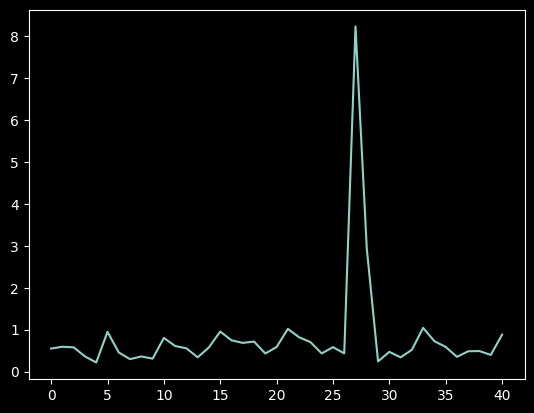

In [7]:
# stds = []
# for i in range(len(indexes) - 1):
#     data = signal[indexes[i]:indexes[i+1]]

#     stds += []

#     #print(f"{data.std():.3f}")

stds = [signal[indexes[i]:indexes[i+1]].std() for i in range(len(indexes) - 1)]

plt.plot(stds)

Тест Уэлча для проверки значимости в различии средних соседних выборок (при различной дисперсии)

Тест Бартлетт для проверки значимости в различии дисперсий соседних выборок

In [8]:
significant_diff = []

for i in range(len(indexes) - 2):
    data1 = signal[indexes[i]:indexes[i+1]]
    data2 = signal[indexes[i+1]:indexes[i+2]]

    if (stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05) \
        and (stats.levene(data1, data2).pvalue > 0.05):

        significant_diff.append(indexes[i+1])


    # print(f"{indexes[i+1]} \
    #        - mean: {stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05} \
    #        - std: {stats.bartlett(data1, data2).pvalue > 0.05} \
    #        ")

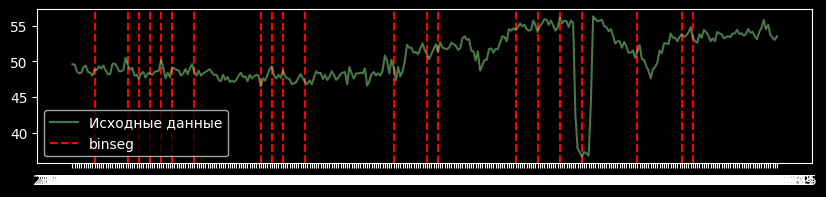

In [9]:
plt.figure(figsize=(10, 2))
plt.plot(df['date'], df[target], alpha=0.5, color='lightgreen', label='Исходные данные', zorder=2)

# for window_size in [14]:
#     df['smoothed'] = df['accuracy_1_%'].rolling(window=window_size).mean()
#     plt.plot(df['date'], df['smoothed'], linewidth=2, color='skyblue', 
#             label=f'Скользящее среднее (окно {window_size})', zorder=3)

significant_diff = [cp for cp in significant_diff if cp < len(df)]

for cp in significant_diff:
    plt.axvline(df['date'].iloc[cp], color="red", 
                linestyle='--', zorder=1, 
                label="binseg" if cp == significant_diff[0] else "")

plt.legend(loc='lower left')

In [10]:
# significant_diff = [55, 145, 185, 230, 255, 280]

# plt.figure(figsize=(10, 1))
# plt.plot(df['date'], df[target], alpha=0.5, color='lightgreen', label='Исходные данные', zorder=2)

# # for window_size in [14]:
# #     df['smoothed'] = df['accuracy_1_%'].rolling(window=window_size).mean()
# #     plt.plot(df['date'], df['smoothed'], linewidth=2, color='skyblue', 
# #             label=f'Скользящее среднее (окно {window_size})', zorder=3)

# significant_diff = [cp for cp in significant_diff if cp < len(df)]

# for cp in significant_diff:
#     plt.axvline(df['date'].iloc[cp], color="red", 
#                 linestyle='--', zorder=1, 
#                 label="binseg" if cp == significant_diff[0] else "")

# plt.legend(loc='lower left')

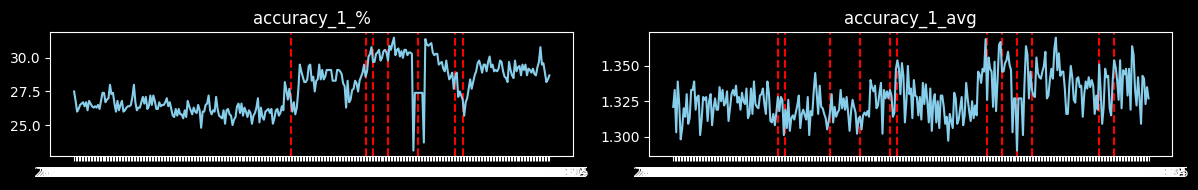

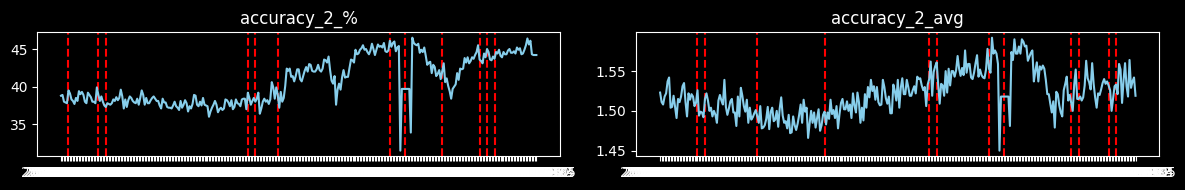

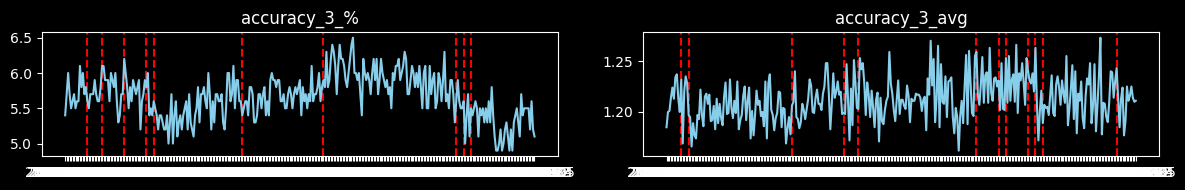

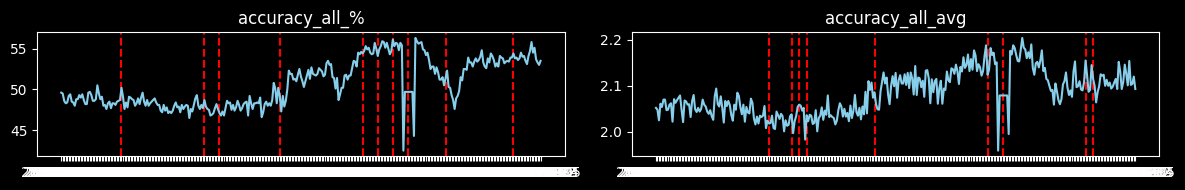

In [17]:


df = pd.read_csv('data/data_with_extra_columns.csv')

col_pairs = [['accuracy_1_%', 'accuracy_1_avg'],
            ['accuracy_2_%', 'accuracy_2_avg'],
            ['accuracy_3_%', 'accuracy_3_avg'],
            ['accuracy_all_%', 'accuracy_all_avg']]

bkps_pairs = [[20, 25],
              [35, 25],
              [20, 25],
              [30, 25]]


def change_points(col, n_bkps=30):

    signal = df[col].values

    model = rpt.Binseg(model="rbf", min_size=5).fit(signal)
    changes = model.predict(n_bkps=n_bkps)

    changes = [cp for cp in changes if cp < len(df)]
    indexes = [0] + changes + [len(signal)-1]

    significant_diff = []

    for i in range(len(indexes) - 2):
        data1 = signal[indexes[i]:indexes[i+1]]
        data2 = signal[indexes[i+1]:indexes[i+2]]

        if (stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05) \
            and (stats.levene(data1, data2).pvalue > 0.05):

            significant_diff.append(indexes[i+1])

    significant_diff = [cp for cp in significant_diff if cp < len(df)]

    return significant_diff



def outlier_process(df):
    Q25 = df.quantile(0.25)
    Q75 = df.quantile(0.75)

    dfmean = df.median()

    IQR = Q75 - Q25

    lbound = Q25 - 1.5 * IQR
    ubound = Q75 + 1.5 * IQR

    dfcop = df.apply(lambda x: dfmean if (x > ubound) else dfmean if (x < lbound) else x)

    return dfcop



#for col in colpairs:

for i in range(4):

    col = col_pairs[i]
    bp = bkps_pairs[i]

    plt.figure(figsize=(12, 2))

    plt.subplot(1, 2, 1)
    plt.plot(df['date'], outlier_process(df[col[0]]), color='skyblue')
    plt.title(col[0])

    significant_diff = change_points(col[0], n_bkps=bp[0])
    for cp in significant_diff:
            plt.axvline(df['date'].iloc[cp], color="red", 
                    linestyle='--', zorder=1, 
                    label="binseg" if cp == significant_diff[0] else "")


    plt.subplot(1, 2, 2)
    plt.plot(df['date'], outlier_process(df[col[1]]), color='skyblue')
    plt.title(col[1])

    significant_diff = change_points(col[1], n_bkps=bp[1])
    for cp in significant_diff:
            plt.axvline(df['date'].iloc[cp], color="red", 
                    linestyle='--', zorder=1, 
                    label="binseg" if cp == significant_diff[0] else "")
            

    plt.tight_layout()
    plt.show()
            

    

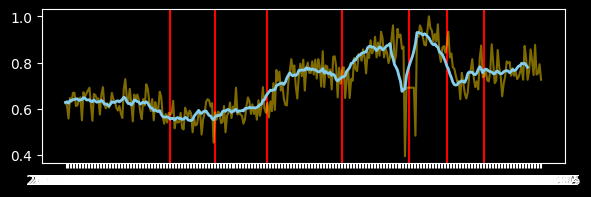

In [25]:
from colorsys import hsv_to_rgb as hsv2rgb
import numpy as np


plt.figure(figsize=(6.75, 2))

# columns = ['accuracy_1_%', 'accuracy_2_%', 'accuracy_3_%', 'accuracy_all_%', 
#            'accuracy_1_avg', 'accuracy_2_avg', 'accuracy_3_avg', 'accuracy_all_avg']

columns = ['accuracy_all_avg']

for i in range(len(columns)): 
    col = columns[i]
    norm = outlier_process( (df[col] - df[col].min()) / (df[col].max() - df[col].min()) )

    for window_size in [10]:
        smoothed = norm.rolling(window=window_size).mean()
        #print(type(smoothed.values[0]))
        smoothed = [x for x in smoothed if not np.isnan(x)]
        plt.plot(df['date'][:-9], smoothed, linewidth=2, color='skyblue', 
                label=f'Скользящее среднее (окно {window_size})', zorder=3)
        
    plt.plot(df['date'], norm, alpha=0.5, color=hsv2rgb((50 + 50*i)/360, 1, 1), label='Исходные данные', linestyle='-')

for cp in [70, 100, 135, 185, 230, 255, 280]:
    plt.axvline(df['date'].iloc[cp], color="red", linestyle='-', zorder=1)

1 - accuracy_3_%

2 - accuracy_2_avg

3 - accuracy_1_%, accuracy_2_%, accuracy_all_%

4 - accuracy_1_%, accuracy_2_%, accuracy_3_%, accuracy_all_%, accuracy_1_avg

5 - accuracy_1_%, accuracy_2_%, accuracy_all_%

6 - accuracy_1_%, accuracy_2_%, accuracy_all_%

7 - accuracy_1_%, accuracy_2_%, accuracy_all_%

In [ ]:
[df['date'].iloc[_] for _ in [70, 100, 135, 185, 230, 255, 280]]

['2024-09-09',
 '2024-10-09',
 '2024-11-13',
 '2025-01-02',
 '2025-02-16',
 '2025-03-13',
 '2025-04-07']